Set parameter Username
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 11.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 6 columns and 6 nonzeros
Model fingerprint: 0x1ddcad82
Model has 15 quadratic objective terms
Variable types: 0 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e+00, 7e+00]
  QObjective range [4e+00, 8e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 3e+00]
Found heuristic solution: objective 9.0000000
Presolve time: 0.00s
Presolved: 16 rows, 21 columns, 51 nonzeros
Variable types: 0 continuous, 21 integer (21 binary)

Root relaxation: objective 2.100000e+01, 7 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | In

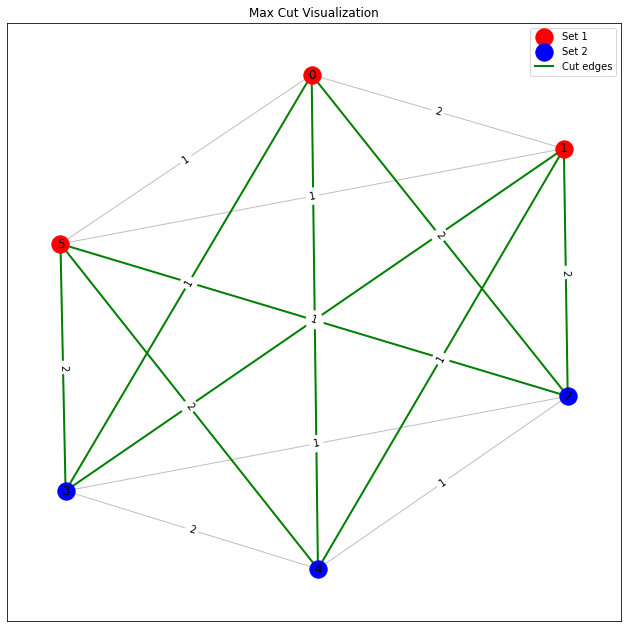

In [1]:
from gurobipy import GRB, Model, quicksum
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def maxcut(edges, n):
    # We want to check that number n (number of vertices) is even
    if (n % 2 != 0):
        raise ValueError('Число вершин должно быть чётным для разделения графа на две равные части')
    model = Model("MaxCut")
    x = model.addVars(n, vtype=GRB.BINARY, name="x")
    
    # This expression equals to zero if x[i]=x[j] and equals to w if x[i]!=x[j]
    model.setObjective(quicksum(w * (x[i] + x[j] - 2 * x[i] * x[j]) for i, j, w in edges), GRB.MAXIMIZE)
    model.addConstr(quicksum(x[i] for i in range(n)) == n // 2)
    model.optimize()
    
    if model.status == GRB.OPTIMAL:
        value = model.objVal
        solution = model.getAttr('x', x)
        set1 = [i for i in range(n) if solution[i] >= 0.9]
        set2 = [i for i in range(n) if solution[i] < 0.1]
        return value, set1, set2
    print("Не нашли оптимальное решение")
    return None, None, None

def visualize_graph(edges, set1, set2):
    G = nx.Graph()
    for i, j, w in edges:
        G.add_edge(i, j, weight=w)
    
    pos = nx.spring_layout(G)
    
    plt.figure(figsize=(11, 11))
    
    nx.draw_networkx_nodes(G, pos, nodelist=set1, node_color='r', label='Set 1')
    nx.draw_networkx_nodes(G, pos, nodelist=set2, node_color='b', label='Set 2')
    
    # All edges
    nx.draw_networkx_edges(G, pos, edgelist=edges, alpha=0.5, edge_color='gray')
    
    # Cut edges
    cut_edges = [(i, j) for i, j, w in edges if (i in set1 and j in set2) or (i in set2 and j in set1)]
    nx.draw_networkx_edges(G, pos, edgelist=cut_edges, width=2.0, edge_color='g', label='Cut edges')
    
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): w for i, j, w in edges})
    
    plt.legend()
    plt.title("Max Cut Visualization")
    plt.show()

num_vert = 6
edges = [(0, 1, 2), (0, 2, 2), (1, 2, 2), (3, 4, 2), (4, 5, 2), (3, 5, 2), (0, 3, 1), (0, 4, 1), (0, 5, 1), (1, 3, 1), (1, 4, 1), (1, 5, 1), (2, 3, 1), (2, 4, 1), (2, 5, 1)]

value, set1, set2 = maxcut(edges, num_vert)
print(value)
print(set1)
print(set2)

visualize_graph(edges, set1, set2)


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 11.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 12 columns and 12 nonzeros
Model fingerprint: 0x51e6080e
Model has 40 quadratic objective terms
Variable types: 0 continuous, 12 integer (12 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+00, 2e+01]
  QObjective range [4e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [6e+00, 6e+00]
Found heuristic solution: objective 39.0000000
Presolve time: 0.00s
Presolved: 41 rows, 52 columns, 132 nonzeros
Variable types: 0 continuous, 52 integer (52 binary)

Root relaxation: objective 7.500000e+01, 13 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestB

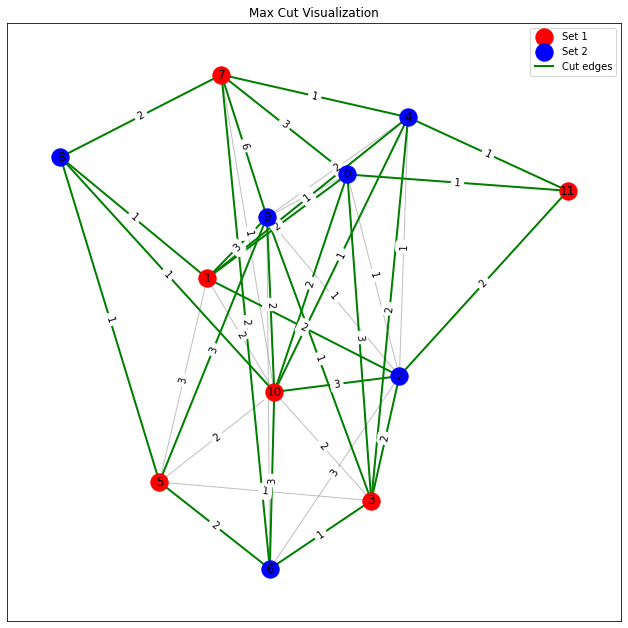

In [3]:
def read_edges_from_file(file_path):
    edges = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        n = int(lines[0].strip())
        for line in lines[1:]:
            parts = line.strip().split()
            if len(parts) != 3:
                continue
            i, j, w = map(int, parts)
            edges.append((i, j, w))
    return n, edges


num_vert, edges = read_edges_from_file("maxcut.txt")
value, set1, set2 = maxcut(edges, num_vert)
print(value)
print(set1)
print(set2)

visualize_graph(edges, set1, set2)